In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getGrayImage(img):
    newImg = np.full((img.shape[0], img.shape[1]), 255, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blue = img[i][j][2]
            green = img[i][j][1]
            red = img[i][j][0]
            gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
            newImg[i, j] = gray
    return newImg

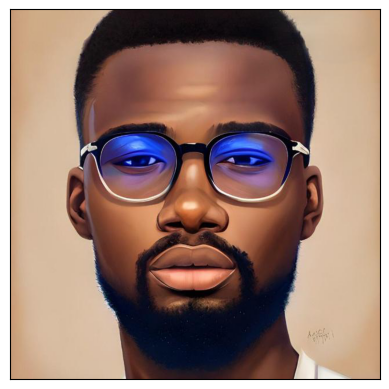

In [3]:
img = plt.imread("mhd.jpg")
plt.imshow(img)
plt.xticks([]); plt.yticks([]);

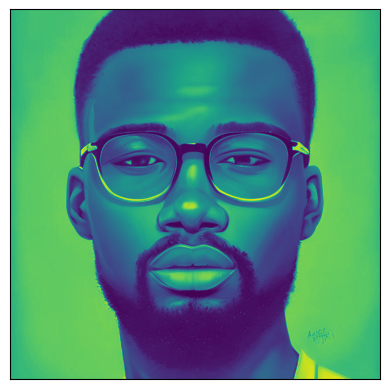

In [4]:
img = getGrayImage(img)
plt.imshow(img)
plt.xticks([]); plt.yticks([]);

Original Image size = (640, 640)
Rank = 639


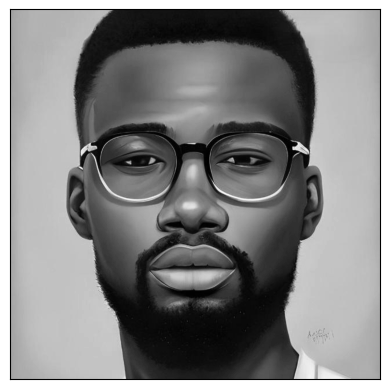

In [5]:
plt.imshow(img, cmap='gray')
plt.xticks([]); plt.yticks([])
print(f"Original Image size = {img.shape}")
print(f"Rank = {np.linalg.matrix_rank(img)}")

In [6]:
A = img.copy()

def eigenDecomposition(A):
    eigenvals = np.linalg.eigvals(A)
    eigenvals = np.where(eigenvals < 1e-10, 0, eigenvals) # replace the negative values by 0 
    sort_indexes = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[sort_indexes]

    print(f"eigenvals = {eigenvals}") # some nonsenses coz i'm having some negative eigenvalues, but A is symetric

    P = np.zeros((A.shape[0], len(eigenvals)))
    
    for i,lambd in enumerate(eigenvals):
        matrix = A - lambd * np.eye(A.shape[0])
        b = np.ones(matrix.shape[0]) * 1e-10
        eigenvect = np.linalg.solve(matrix, b) # solve (A - lambda*I)x = 0 to get the eigen vector
        P[:, i] = eigenvect / np.linalg.norm(eigenvect) # normalize it 
    
    D = np.zeros( (len(eigenvals), len(eigenvals)) )
    for i in range(len(eigenvals)):
        D[i, i] = eigenvals[i]


    return P, D, P.T

def SVD(A):
    P , D, _ = eigenDecomposition(A.T@A)
    V = P
    S = np.sqrt(D)
    D_zero_lines = np.all(D==0, axis=1) # lines that contain only 0
    # We have to remove those lines with only zero, that means that the eigen val is 0 and as we have to divide after by them...
    nb_non_zeros = D.shape[0] - np.sum(D_zero_lines) # number of non zero lines
    S = S[:nb_non_zeros, :nb_non_zeros] # reshape S, to take only the non zero eigen vals
    V = V[:, :nb_non_zeros] # take only eigen vects corresponding to the non nul eigen vals
    U = np.zeros((A.shape[0], S.shape[0]))
    for i in range(nb_non_zeros):
        v_i = V[:,i]
        u_i = (1/D[i,i]) * A @ v_i
        U[:, i] = u_i
    return U, S, V.T


In [7]:
U, S, VT = SVD(A)

(640, 320)
(320, 320)
(320, 640)
New Image Dim = (640, 640)
New Image Rank = 320


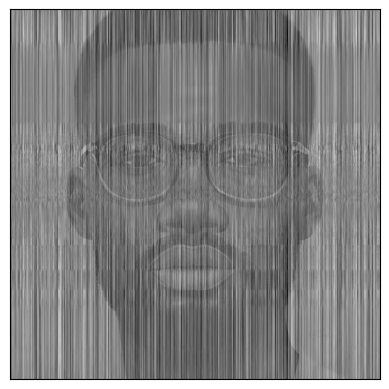

In [8]:
print(U.shape)
print(S.shape)
print(VT.shape)
new_img = U @ S @ VT + U @ S @ VT
plt.imshow(new_img, cmap='gray')
plt.xticks([]); plt.yticks([]);
print(f"New Image Dim = {new_img.shape}")
print(f"New Image Rank = {np.linalg.matrix_rank(new_img)}")